In [1]:
library(stringr)
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


# Gases

In [8]:
ggc_others <- read.table('../data/Gas-others_wt.txt', header = TRUE, sep = '\t') %>% 
                    select(Replicate, gas, Concentration, Time, condition, microbe) %>% 
                    subset(Time > 6*24 & Time < 7*24 ) 

In [9]:
ggc_all <- read.table('../data/Gas_wt.txt', stringsAsFactors = FALSE) %>% 
                    select(Replicate, gas, Concentration, Time, condition, microbe) %>% 
                    subset(Time > 6*24 & Time < 7*24) 

In [10]:
ggc <- union(ggc_all, ggc_others)

Warning message:
“Column `Replicate` joining character vector and factor, coercing into character vector”Warning message:
“Column `gas` joining character vector and factor, coercing into character vector”Warning message:
“Column `condition` joining character vector and factor, coercing into character vector”Warning message:
“Column `microbe` joining character vector and factor, coercing into character vector”

In [11]:
ggc$xlab <- str_c(ggc$condition, ggc$microbe, sep = '-')

In [22]:
p.h2 <- ggplot(data = ggc %>% subset(gas == "H2")
               , aes(x = xlab, y = Concentration, fill = microbe)) + 
            geom_hline(yintercept = 0, color = 'lightgrey', size = 0.25) +
            geom_jitter(width = 0.2, height=0, color = 'black', size = 2, shape = 21, alpha = 0.6) +
            ylim(c(0,NA)) +

            theme_light() + ylab(expression('H'[2]*' (mmol.L'^-1*')')) + xlab('') + 

            theme(legend.position = 'None'
                 , panel.grid = element_blank()
                 , axis.title.y = element_text(margin = margin(t = 0, b = 0, r = -0.1, l = 0))
                 , axis.text.x = element_text(size = 8.5, colour = "black", angle = 30, vjust = 1, hjust = 1)
                 , axis.text.y = element_text(size = 8.5, colour = "black")
                 ) 

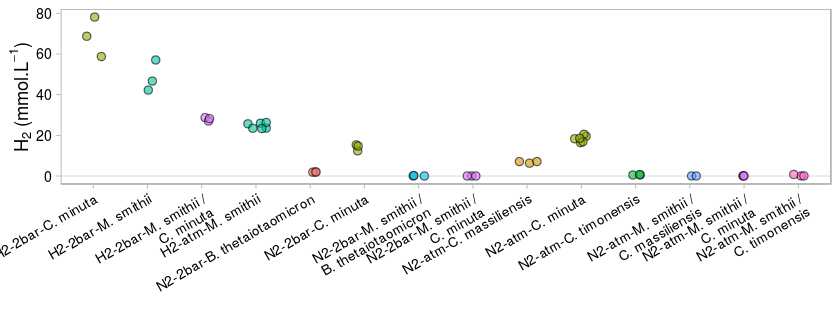

In [23]:
options(repr.plot.width=7, repr.plot.height=2.7)
p.h2

In [24]:
p.ch4 <- ggplot(data = ggc %>% subset(gas == "CH4" )
               , aes(x = xlab, y = Concentration, fill = microbe)) + 
            geom_hline(yintercept = 0, color = 'lightgrey', size = 0.25) +
            geom_jitter(width = 0.2, height=0, color = 'black', size = 2, shape = 21, alpha = 0.6) +
            ylim(c(0,NA)) +

            theme_light() + ylab(expression('CH'[4]*' (mmol.L'^-1*')')) + xlab('') + 

            theme(legend.position = 'None'
                 , panel.grid = element_blank()
                 , axis.title.y = element_text(margin = margin(t = 0, b = 0, r = 0, l = 0))
                 , axis.text.x = element_text(size = 8.5, colour = "black", angle = 30, vjust = 1, hjust = 1)
                 , axis.text.y = element_text(size = 8.5, colour = "black")
                 , legend.text = element_text(size = 8.5, colour = "black", vjust =0, hjust = 0.5)) 
            

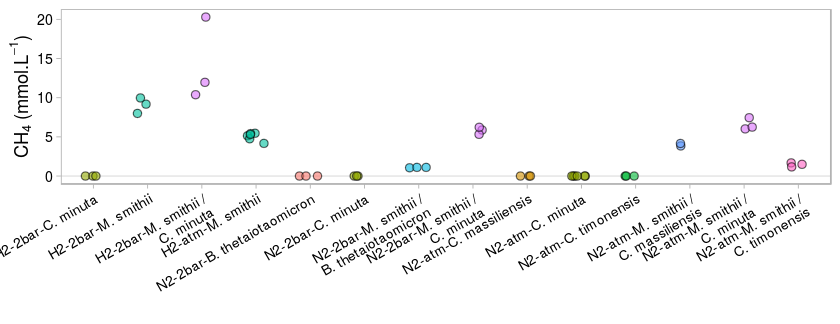

In [25]:
options(repr.plot.width=7, repr.plot.height=2.7)
p.ch4

In [27]:
ggsave(p.h2, filename = '/ebio/abt3_projects/Methanogen_SCFA/Metagenomes_methanogen/Christen/Co-cultures/Figures/S3_h2.png', width = 7, height = 2.7, device = 'png')
ggsave(p.ch4, filename = '/ebio/abt3_projects/Methanogen_SCFA/Metagenomes_methanogen/Christen/Co-cultures/Figures/S3_ch4.png', width = 7, height = 2.7, device = 'png')

# SCFA

In [28]:
scfa_other <- read.table('../data/SCFA-others_wt.txt', sep = '\t', header = TRUE) %>% 
                    select(Sample, Name, Concentration, Time, condition, microbe) %>% 
                    subset(Time > 6*24 & Time < 7*24 & microbe != 'None' & Name != 'Sum' & Sample != 'C' & Sample != 'M') 
scfa_other$xlab <- str_c(scfa_other$condition, scfa_other$microbe, sep = '-')

In [29]:
scfa_all <- read.table('../data/SCFA_wt.txt', stringsAsFactors = FALSE) %>% 
                    select(Sample, Name, Concentration, Time, SampleBatch, microbe) %>% 
                    subset(Time > 6*24 & Time < 7*24 & microbe != 'None'& Name != 'Sum' & SampleBatch != 'MH2op') 

In [30]:
scfa_all$gas <- ifelse(str_detect(scfa_all$SampleBatch, pattern = 'H2') | str_detect(scfa_all$SampleBatch, pattern = 'op'), 'H2', 'N2')
scfa_all$pressure <- ifelse(str_detect(scfa_all$SampleBatch, pattern = 'atm'), 'atm', '2bar')
scfa_all$xlab <- str_c(scfa_all$gas, scfa_all$pressure, scfa_all$microbe, sep = '-')

In [31]:
scfa <- bind_rows(scfa_other %>% select(-condition)
              , scfa_all %>% select(Sample, Name, Concentration, Time, xlab, microbe) )

Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding factor and character vector, coercing into character vector”Warning message in bind_rows_(x, .id):
“binding character and factor vector, coercing into character vector”

In [32]:
p.ace <- ggplot(data = scfa %>% subset(Name == "Acetate")
               , aes(x = xlab, y = Concentration, fill = microbe) ) + 
            geom_hline(yintercept = 0, color = 'lightgrey', size = 0.25) +
            geom_jitter(width = 0.2, height=0, color = 'black', size = 2, shape = 21, alpha = 0.6) +

            scale_alpha_manual(values = c(0,1)) +
            ylim(c(0,NA)) +

            theme_light() + ylab(expression('Acetate (mmol.L'^-1*')')) + xlab('') + 

            theme(legend.position = 'None'
                 , panel.grid = element_blank()
                 , axis.text.x = element_text(size = 8.5, colour = "black", angle = 30, vjust = 1, hjust = 1)
                 , axis.text.y = element_text(size = 8.5, colour = "black")
                 , axis.title.y = element_text(margin = margin(t = 0, b = 0, r = -0.1, l = 0))
                 , legend.text = element_text(size = 8.5, colour = "black", vjust =0, hjust = 0.5)) 

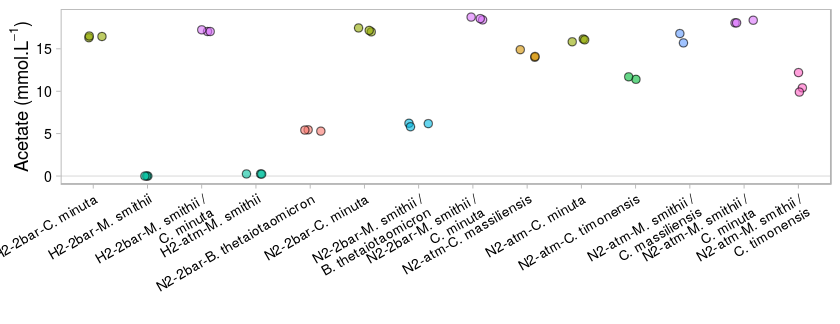

In [33]:
options(repr.plot.width=7, repr.plot.height=2.7)
p.ace

In [34]:
p.but <- ggplot(data = scfa %>% subset(Name == "Butyrate")
               , aes(x = xlab, y = Concentration, fill = microbe) ) + 
            geom_hline(yintercept = 0, color = 'lightgrey', size = 0.25) +
            geom_jitter(width = 0.2, height=0, color = 'black', size = 2, shape = 21, alpha = 0.6) +

            scale_alpha_manual(values = c(0,1)) +
            ylim(c(0,NA)) +

            theme_light() + ylab(expression('Butyrate (mmol.L'^-1*')')) + xlab('') + 

            theme(legend.position = 'None'
                 , panel.grid = element_blank()
                 , axis.text.x = element_text(size = 8.5, colour = "black", angle = 30, vjust = 1, hjust = 1)
                 , axis.text.y = element_text(size = 8.5, colour = "black")
                 , axis.title.y = element_text(margin = margin(t = 0, b = 0, r = 5, l = 0))
                 , legend.text = element_text(size = 8.5, colour = "black", vjust =0, hjust = 0.5)) 

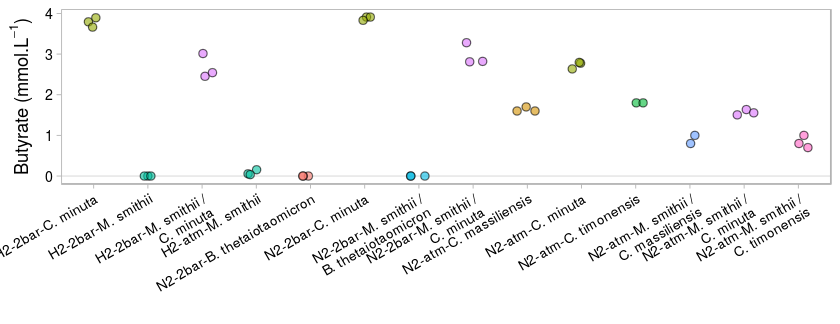

In [35]:
options(repr.plot.width=7, repr.plot.height=2.7)
p.but

In [36]:
ggsave(p.ace, filename = '/ebio/abt3_projects/Methanogen_SCFA/Metagenomes_methanogen/Christen/Co-cultures/Figures/S3_ace.png', width = 7, height = 2.7, device = 'png')
ggsave(p.but, filename = '/ebio/abt3_projects/Methanogen_SCFA/Metagenomes_methanogen/Christen/Co-cultures/Figures/S3_but.png', width = 7, height = 2.7, device = 'png')